# Adult census to predict Income

In [72]:
import numpy as np
import pandas as pd

from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

## Loading the data sets 
Source: Census Income Data Set UCI repository

In [47]:

columns = ['Age','Workclass','fnlgwt','Education','Education num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Native country','Income']
train = pd.read_csv('adult-training.csv', names=columns)
test = pd.read_csv('adult-test.csv', names=columns, skiprows=1)

## Data Exploration

### Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         32561 non-null object
fnlgwt            32561 non-null int64
Education         32561 non-null object
Education num     32561 non-null int64
Marital Status    32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital Gain      32561 non-null int64
Capital Loss      32561 non-null int64
Hours/Week        32561 non-null int64
Native country    32561 non-null object
Income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Attribute Information:

#### Listing of attributes:

###### >50K, <=50K.

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, 
Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


In [49]:
train.describe()

,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [50]:
train.head(10)

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [51]:
train.isnull().count()

Age               32561
Workclass         32561
fnlgwt            32561
Education         32561
Education num     32561
Marital Status    32561
Occupation        32561
Relationship      32561
Race              32561
Sex               32561
Capital Gain      32561
Capital Loss      32561
Hours/Week        32561
Native country    32561
Income            32561
dtype: int64

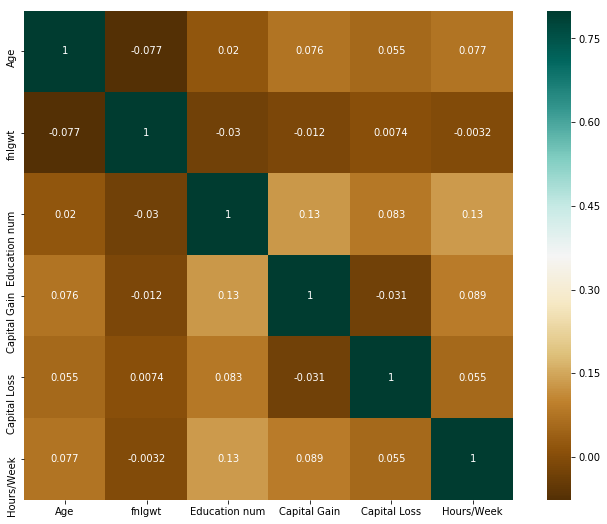

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
temp= test
hmap = temp.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(hmap, vmax=.8,annot=True,cmap="BrBG", square=True);

## Data Cleaning

In [53]:
train_clean = train.replace(' ?', np.nan).dropna()
test_clean = test.replace(' ?', np.nan).dropna()

In [54]:
train.isnull().values.any()

False

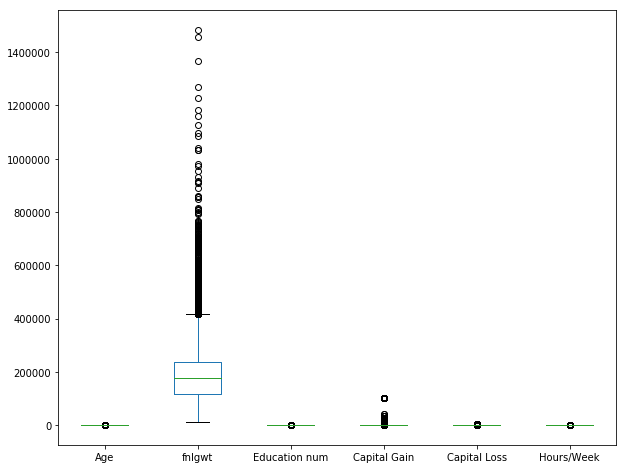

In [55]:
train.select_dtypes(exclude= 'category').plot(kind = 'box', figsize = (10,8))

# #Fit scaler on train data only. Transform training and testing set

In [56]:
numerical_col = ["Age", "fnlgwt", "Education num", "Capital Gain",
                     "Capital Loss", "Hours/Week"]
scaler = StandardScaler()
train_clean[numerical_col] = scaler.fit_transform(train_clean[numerical_col])
test_clean[numerical_col] = scaler.transform(test_clean[numerical_col])

## splitting DataSet

In [57]:

Y_train = train_clean["Income"]
X_train = train_clean.drop("Income", axis=1)

Y_test = test_clean["Income"]
X_test = test_clean.drop("Income", axis=1)

## One Hot Encoding to convert categorical variable into numeric

In [62]:
data = pd.concat([X_train,X_test])
dataEncoded = pd.get_dummies(data)      

X_trainEncoded = dataEncoded[:len(X_train)]
X_testEncoded = dataEncoded[len(X_train):]

print (Y_train.head(10))

Y_trainEncoded = Y_train.replace([' <=50K',' >50K' ] , [0,1] )
Y_testEncoded = Y_test.replace([' <=50K.' , ' >50K.'] , [0,1])

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
5     <=50K
6     <=50K
7      >50K
8      >50K
9      >50K
Name: Income, dtype: object


## Sucessfully Encoded Income into 1 and 0

In [61]:
Y_trainEncoded

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        1
8        1
9        1
10       1
11       1
12       0
13       0
15       0
16       0
17       0
18       0
19       1
20       1
21       0
22       0
23       0
24       0
25       1
26       0
28       0
29       0
30       0
31       0
        ..
32526    0
32527    0
32528    0
32529    0
32532    1
32533    1
32534    0
32535    0
32536    1
32537    0
32538    1
32540    0
32543    0
32544    0
32545    1
32546    0
32547    0
32548    0
32549    0
32550    0
32551    0
32552    0
32553    0
32554    1
32555    0
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Income, Length: 30162, dtype: int64

## Creating Gaussian Model

In [66]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
clf = None
parameters = {}

clf = GaussianNB()


clf_gs = GridSearchCV(clf ,parameters, verbose=1)

clf_gs.fit(X_trainEncoded,Y_trainEncoded)

Y_pred = clf_gs.predict(X_testEncoded)
#print (Y_pred)

data1= confusion_matrix(Y_testEncoded,Y_pred)
cf_df= pd.DataFrame(data1,columns=['Predicted No','Predicted Yes'], index=['Actual No', 'Actual yes'])
cf_df



C:\Users\Hareesh\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s finished


,Predicted No,Predicted Yes
Actual No,5077,6283
Actual yes,251,3449


In [74]:
acc = accuracy_score(Y_testEncoded, Y_pred)

print ("Naive Bayes Approach")
print("Model Accuracy: ",acc*100.0)
precision= precision_score(Y_testEncoded, Y_pred, average= "weighted")  
print("Model precision:", precision*100)
print("recall score:", recall_score(Y_testEncoded, Y_pred, average='weighted')*100)

scores = cross_val_score(clf_gs, X_testEncoded, Y_testEncoded, cv=5)
scores.mean()

Naive Bayes Approach
Model Accuracy:  56.613545816733065
Model precision: 80.58503935526056
recall score: 56.613545816733065
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


0.5471447543160691

## Logistic Regression Model

In [70]:
lrn = LogisticRegression(penalty = 'l1', C = .001, class_weight='balanced')

lrn.fit(X_trainEncoded, Y_trainEncoded)
Y_pred = lrn.predict(X_testEncoded)
data1=(confusion_matrix(Y_testEncoded,Y_pred))
cf_df= pd.DataFrame(data1,columns=['Predicted No','Predicted Yes'], index=['Actual No', 'Actual yes'])
print("Confusion Matrix")
cf_df



Confusion Matrix


,Predicted No,Predicted Yes
Actual No,7987,3373
Actual yes,365,3335


In [71]:
acc = accuracy_score(Y_testEncoded, Y_pred)

print ("Logistic Regression Approach")
print("Model Accuracy: ",acc*100.0)
precision= precision_score(Y_testEncoded, Y_pred, average= "weighted")  
print("Model precision:", precision*100)
print("recall score:", recall_score(Y_testEncoded, Y_pred, average='weighted')*100)

scores = cross_val_score(lrn, X_testEncoded, Y_testEncoded, cv=5)
scores

Logistic Regression Approach
Model Accuracy:  75.1792828685259
Model precision: 84.34969480378861
recall score: 75.1792828685259


array([0.65737052, 0.64940239, 0.64010624, 0.6500664 , 0.65205843])

## Decision Tree Classifier Model

In [77]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [78]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_trainEncoded,Y_trainEncoded)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [79]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_trainEncoded,Y_trainEncoded)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [80]:
y_pred = clf_gini.predict(X_testEncoded)
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [81]:
print(" Model Accuracy is ", accuracy_score(Y_testEncoded,y_pred)*100)

 Model Accuracy is  83.92430278884461


In [82]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [83]:
data1=(confusion_matrix(Y_testEncoded,Y_pred))

In [84]:
cf_df= pd.DataFrame(data1,columns=['Predicted No','Predicted Yes'], index=['Actual No', 'Actual yes'])
cf_df

,Predicted No,Predicted Yes
Actual No,7987,3373
Actual yes,365,3335


In [85]:
precision= precision_score(Y_testEncoded, y_pred, average= "weighted")  
print("Model precision:", precision*100)
print("recall score:", recall_score(Y_testEncoded, y_pred, average='weighted')*100)

Model precision: 83.14452460189196
recall score: 83.92430278884461


In [86]:
scores = cross_val_score(clf_gs, X_testEncoded, Y_testEncoded, cv=5)
scores.mean()

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


0.5471447543160691